# Performance as a function focal plane position

Authors: Keith Bechtol and Angelo Fausti

Date: 31 May 2018

Stack Version: weekly 2018_21

The goal of this notebook is to demonstrate methods to compile performance metrics from a set of individual visits and assemble as a function focal plane position (sensor number or x,y position in instrument coordinates).

In [103]:
import pandas as pd

import lsst.daf.persistence as daf_persistence

%matplotlib inline
import matplotlib.pyplot as plt

HSC PDR1

Information available here: https://confluence.lsstcorp.org/display/DM/S18+HSC+PDR1+reprocessing

The output repos are:

/datasets/hsc/repo/rerun/DM-13666/UDEEP/
/datasets/hsc/repo/rerun/DM-13666/DEEP/
/datasets/hsc/repo/rerun/DM-13666/WIDE/


In [65]:
band = 'HSC-R'
depth = 'WIDE' # WIDE, DEEP, UDEEP
field = 'SSP_WIDE'
butler = daf_persistence.Butler('/datasets/hsc/repo/rerun/DM-13666/%s/'%(depth))

As a side note, you can find out all the field names in SSP with the following command

In [66]:
unique_visits = butler.queryMetadata('src', ['field'])
[ field for field in unique_visits if 'SSP' in field ]

['SSP_WIDE',
 'SSP_UDEEP_SXDS',
 'SSP_UDEEP_COSMOS',
 'SSP_DEEP_DEEP2_3',
 'SSP_AEGIS',
 'SSP_DEEP_COSMOS',
 'SSP_DEEP_ELAIS_N1',
 'SSP_DEEP_XMM_LSS',
 'SSP_DEEP_XMMS_LSS']

In [67]:
unique_visits = butler.queryMetadata('src', ['visit'], dataId={'filter':band, 'field':field})
print('Found %i unique visits in %s band %s depth survey'%(len(unique_visits), band, depth))

Found 818 unique visits in HSC-R band WIDE depth survey


In [91]:
def getSrcFullFocalPlane(visit, band):
    subset = butler.subset('src', **{'filter':band, 'visit':visit})
    #print(len(subset.cache))
    df_array =[]
    for dataid in subset.cache:
        if butler.datasetExists('src', dataId=dataid):
            #print('It exists:', dataid['ccd'])
            src = butler.get('src', dataId=dataid)
            df_array.append(src.asAstropy().to_pandas())
            #data = {'x': src.getX(),
            #        'y': src.getY()}
            #df_array.append(pd.DataFrame(data=data))
        else:
            pass
            #print('No go:', dataid['ccd'])
            
    return pd.concat(df_array)

In [92]:
#subset = butler.subset('calexp', **{'filter':band, 'visit':unique_visits[0]})
#for ii in range(0, len(subset.cache)):
#    src = butler.get('src', **subset.cache[ii])
#butler.queryMetadata('calexp', ['visit', 'ccd', 'filter'], dataId={'filter':band, 'visit':unique_visits[0]})

n_visits = 1
for ii in range(0, n_visits):
    df = getSrcFullFocalPlane(unique_visits[ii], band)
    #print('Visit = %i'%(unique_visits[ii])
    #src = butler.get('src', dataId={'visit':unique_visits[ii], 'filter':band, 'ccd':0})

In [105]:
#for column in df.columns: print(column)
list(df.columns.values)

['base_Blendedness_abs_child_xx',
 'base_Blendedness_abs_child_xy',
 'base_Blendedness_abs_child_yy',
 'base_Blendedness_abs_flux',
 'base_Blendedness_abs_flux_child',
 'base_Blendedness_abs_flux_parent',
 'base_Blendedness_abs_parent_xx',
 'base_Blendedness_abs_parent_xy',
 'base_Blendedness_abs_parent_yy',
 'base_Blendedness_flag',
 'base_Blendedness_flag_noCentroid',
 'base_Blendedness_flag_noShape',
 'base_Blendedness_old',
 'base_Blendedness_raw_child_xx',
 'base_Blendedness_raw_child_xy',
 'base_Blendedness_raw_child_yy',
 'base_Blendedness_raw_flux',
 'base_Blendedness_raw_flux_child',
 'base_Blendedness_raw_flux_parent',
 'base_Blendedness_raw_parent_xx',
 'base_Blendedness_raw_parent_xy',
 'base_Blendedness_raw_parent_yy',
 'base_CircularApertureFlux_12_0_flag',
 'base_CircularApertureFlux_12_0_flag_apertureTruncated',
 'base_CircularApertureFlux_12_0_flag_sincCoeffsTruncated',
 'base_CircularApertureFlux_12_0_flux',
 'base_CircularApertureFlux_12_0_fluxSigma',
 'base_Circular

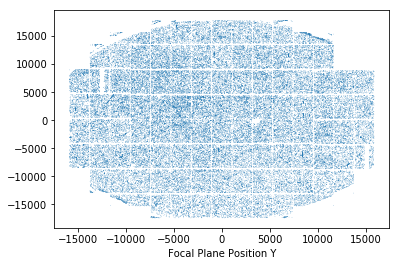

In [108]:
plt.figure()
plt.scatter(df.base_FPPosition_x, df.base_FPPosition_y, edgecolor='none', marker='.', s=1)
plt.xlabel('Focal Plane Position X')
plt.xlabel('Focal Plane Position Y')